In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [4]:
df = datasets.load_iris()
x = np.array(df.data)
y = np.array(df.target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
model = KNN(k=5)
model.fit(x_train, y_train)

In [6]:
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

0.9666666666666667

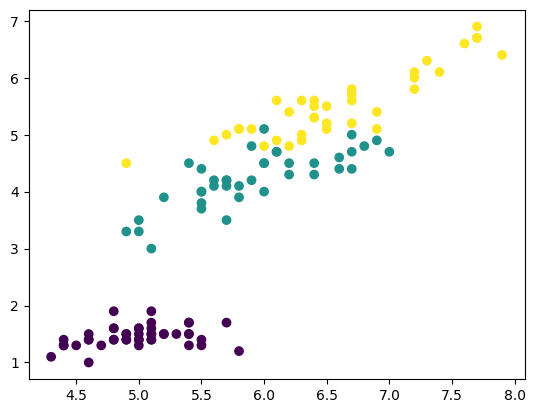

In [10]:
plt.scatter(x_train[:, 0], x_train[:, 2], c=y_train)
plt.show()